In [34]:
import numpy as np  
import pandas as pd  
  
import matplotlib.pyplot as plt  
import plotly.express as px  
from plotly.offline import init_notebook_mode, iplot  
init_notebook_mode(connected=True)  
  
from sklearn.decomposition import PCA  
  
from sklearn. preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  
  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score, recall_score, f1_score  
 
import pickle

In [35]:
import numpy as np  
import pandas as pd  
  
import matplotlib.pyplot as plt  
import plotly.express as px  
from plotly.offline import init_notebook_mode, iplot  
init_notebook_mode(connected=True)  
  
from sklearn.decomposition import PCA  
  
from sklearn. preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  
  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score, recall_score, f1_score  
 
import pickle

In [36]:
dataframe = pd.read_csv('collegePlace_tweak.csv')  

In [37]:
dataframe.shape  

(4934, 8)

In [38]:
dataframe.head() 

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Mechanical,0,6.914633,1,0,0
1,22,Male,Computer Science,1,6.973175,0,0,0
2,21,Male,Civil,0,6.000000,0,0,0
3,21,Male,Electrical,1,7.000000,0,0,1
4,19,Male,Information Technology,2,6.000000,0,0,1


In [39]:
dataframe.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4934 entries, 0 to 4933
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                4934 non-null   int64  
 1   Gender             4934 non-null   object 
 2   Stream             4934 non-null   object 
 3   Internships        4934 non-null   int64  
 4   CGPA               4934 non-null   float64
 5   Hostel             4934 non-null   int64  
 6   HistoryOfBacklogs  4934 non-null   int64  
 7   PlacedOrNot        4934 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 308.5+ KB


In [40]:
dataframe.describe()  

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000
mean,21.482975,0.703283,7.075324,0.264491,0.194974,0.555128
std,1.323436,0.743866,0.965338,0.441107,0.396221,0.497002
min,19.000000,0.000000,4.906799,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.097988,1.000000,1.000000,1.000000


In [41]:
figure = px.scatter(dataframe, x="CGPA", y="Internships", color="PlacedOrNot", hover_data=['CGPA'])  
figure.show()  

In [42]:
px.histogram(dataframe, x='PlacedOrNot', color='PlacedOrNot', barmode='group')

In [43]:
figure = px.pie(dataframe, values=dataframe['PlacedOrNot'].value_counts().values, names=dataframe['PlacedOrNot'].value_counts().index, title='Placed Vs Not Placed')  
figure.show()  

In [44]:
figure = px.box(dataframe, y=['Internships','CGPA', 'Age'])  
figure.show()  

In [45]:
dataframe['Gender'] = dataframe['Gender'].map({'Male': 1, 'Female': 0})  

In [46]:
dataframe['Stream'].unique()  

array(['Mechanical', 'Computer Science', 'Civil', 'Electrical',
       'Information Technology', 'Electronics And Communication'],
      dtype=object)

In [47]:
dataframe['Stream'] = dataframe['Stream'].map({'Civil':1, 
                                               'Information Technology':2, 
                                               'Electrical':3, 
                                               'Electronics And Communication':4,
                                               'Mechanical':5, 
                                               'Computer Science':6})  

In [48]:
dataframe.sample(5) 

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
1819,24,1,6,1,7.000000,0,0,1
3286,21,0,6,1,8.000000,1,0,1
4510,21,1,6,0,6.973849,0,1,0
2648,22,1,2,1,6.062684,1,0,0
1289,22,1,6,0,7.000000,0,0,0


In [49]:
X = dataframe.iloc[:,0:7]  
y = dataframe.iloc[:,-1]  
X  


,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,1,5,0,6.914633,1,0
1,22,1,6,1,6.973175,0,0
2,21,1,1,0,6.000000,0,0
3,21,1,3,1,7.000000,0,0
4,19,1,2,2,6.000000,0,0
...,...,...,...,...,...,...,...
4929,22,1,4,1,7.936204,0,0
4930,22,1,2,1,8.093630,1,0
4931,22,1,2,2,8.000000,0,0
4932,26,1,5,0,6.911940,1,0


In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33) 

In [51]:
print(X_train.shape)  
print(X_test.shape)  
print(y_train.shape)  
print(y_test.shape)  

(3305, 7)
(1629, 7)
(3305,)
(1629,)


In [52]:
scaler = StandardScaler()  
X_train_scale = scaler.fit_transform(X_train)  
X_test_scale = scaler.transform(X_test) 

In [55]:
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression()  
  
# Without Scaling  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("Without Scaling and With CV: ",scores.mean())  
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)  
print("With Scaling and With CV: ",scores.mean())  

Without Scaling and CV:  0.7790055248618785
Without Scaling and With CV:  0.7667243431291769
With Scaling and Without CV:  0.7790055248618785
With Scaling and With CV:  0.7667243431291769


In [56]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier(random_state=0)  
  
#without scaling  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("Without Scaling and With CV: ",scores.mean())  
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)  
print("With Scaling and With CV: ",scores.mean()) 

Without Scaling and CV:  0.8839779005524862
Without Scaling and With CV:  0.8741462968049071
With Scaling and Without CV:  0.8839779005524862
With Scaling and With CV:  0.8741462968049071


Without Scaling and CV:  0.8815224063842848
Without Scaling and With CV:  0.8929021331136135


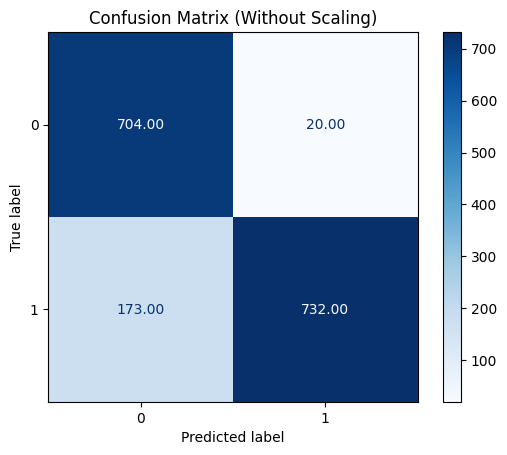

With Scaling and Without CV:  0.8815224063842848
With Scaling and With CV:  0.8932051634166438


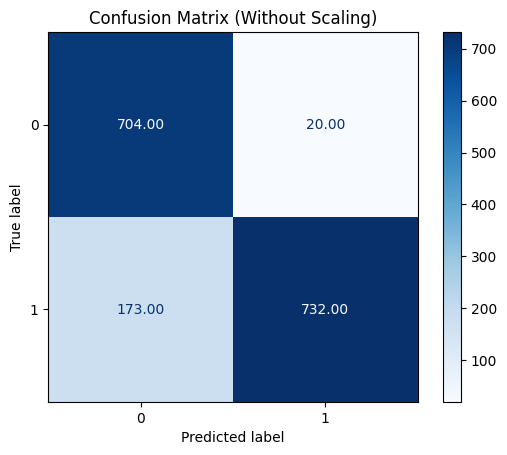

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt 
  
classifier = RandomForestClassifier(max_depth=10, random_state=0)  
  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("Without Scaling and With CV: ",scores.mean())  

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='.2f')
plt.title('Confusion Matrix (Without Scaling)')
plt.show()
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)  
print("With Scaling and With CV: ",scores.mean()) 

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='.2f')
plt.title('Confusion Matrix (Without Scaling)')
plt.show()

In [57]:
from sklearn.svm import SVC  
  
svc = SVC()  
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}  
classifier = GridSearchCV(svc, parameters)  
  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("Without Scaling and With CV: ",scores.mean())  
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)  
print("With Scaling and With CV: ",scores.mean())  

Without Scaling and CV:  0.7998772252915899
Without Scaling and With CV:  0.7936565046232721
With Scaling and Without CV:  0.8686310620012277
With Scaling and With CV:  0.8814007140895359


In [58]:
from sklearn.naive_bayes import CategoricalNB  
classifier = CategoricalNB()  
  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))  

Without Scaling and CV:  0.8096992019643954


In [59]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

ada_classifier = AdaBoostClassifier()
gb_classifier = GradientBoostingClassifier()

ada_parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
}

gb_parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5],
}

rf_parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

grid_search_ada = GridSearchCV(ada_classifier, ada_parameters, cv=10)
grid_search_ada.fit(X_train, y_train)
y_pred_ada = grid_search_ada.predict(X_test)
print("AdaBoost - Without Scaling and CV:", accuracy_score(y_test, y_pred_ada))
scores_ada = cross_val_score(grid_search_ada, X_train, y_train, cv=10)
print("AdaBoost - With Scaling and With CV:", scores_ada.mean())

grid_search_gb = GridSearchCV(gb_classifier, gb_parameters, cv=10)
grid_search_gb.fit(X_train, y_train)
y_pred_gb = grid_search_gb.predict(X_test)
print("Gradient Boosting - Without Scaling and CV:", accuracy_score(y_test, y_pred_gb))
scores_gb = cross_val_score(grid_search_gb, X_train, y_train, cv=10)
print("Gradient Boosting - With Scaling and With CV:", scores_gb.mean())

AdaBoost - Without Scaling and CV: 0.8575813382443217
AdaBoost - With Scaling and With CV: 0.872625652293326
Gradient Boosting - Without Scaling and CV: 0.8784530386740331
Gradient Boosting - With Scaling and With CV: 0.8835274192071776


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define your parameter grid
param_grid_svc = {
    'base_estimator__C': [0.1, 1, 10],
    'base_estimator__kernel': ['linear', 'rbf', 'poly'],
    'base_estimator__gamma': ['scale', 'auto', 0.1, 1],
}

# Create an SVC classifier with probability=True
svc_classifier = SVC(probability=True)

# Create an AdaBoostClassifier with the SVC base estimator
adaboost_classifier = AdaBoostClassifier(base_estimator=svc_classifier)

# Create a GridSearchCV object
grid_search = GridSearchCV(adaboost_classifier, param_grid=param_grid_svc, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to your data
grid_search.fit(X_train_scale, y_train)

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Print the results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Best parameters:", grid_search.best_params_)
print("Best estimator:", grid_search.best_estimator_)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

base_estimator = RandomForestClassifier(bootstrap=False, max_depth=5, max_features=None, min_samples_split=2, n_estimators=100, random_state=0)
adaboost_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=0)

adaboost_classifier.fit(X_train_scale, y_train)

y_pred = adaboost_classifier.predict(X_test)

print("Without CV:", accuracy_score(y_test, y_pred))

scores = cross_val_score(adaboost_classifier, X_train_scale, y_train, cv=10)
print("With CV:", scores.mean())

print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

In [ ]:
import pickle
pickle.dump(grid_search_gb,open('model.pkl','wb'))

In [ ]:
pickled = pickle.load(open('model.pkl','rb'))
test_data = pd.read_csv('test_tweak.csv')
test_data['Gender'] = test_data['Gender'].map({'Male': 1, 'Female': 0}) 
test_data['Stream'] = test_data['Stream'].map({'Civil':1,
                                               'Information Technology':2,
                                               'Electrical':3,
                                               'Electronics And Communication':4,
                                               'Mechanical':5,
                                               'Computer Science':6})
x = test_data.iloc[:,0:7]
y = test_data.iloc[:,-1]
pickled.predict(x)

Feature Importances:
Age: 0.09134986914803817
Gender: 0.007413476502479624
Stream: 0.04218081243599097
Internships: 0.0971987465919076
CGPA: 0.7360262439373987
Hostel: 0.011168417183318511
HistoryOfBacklogs: 0.014662434200866463


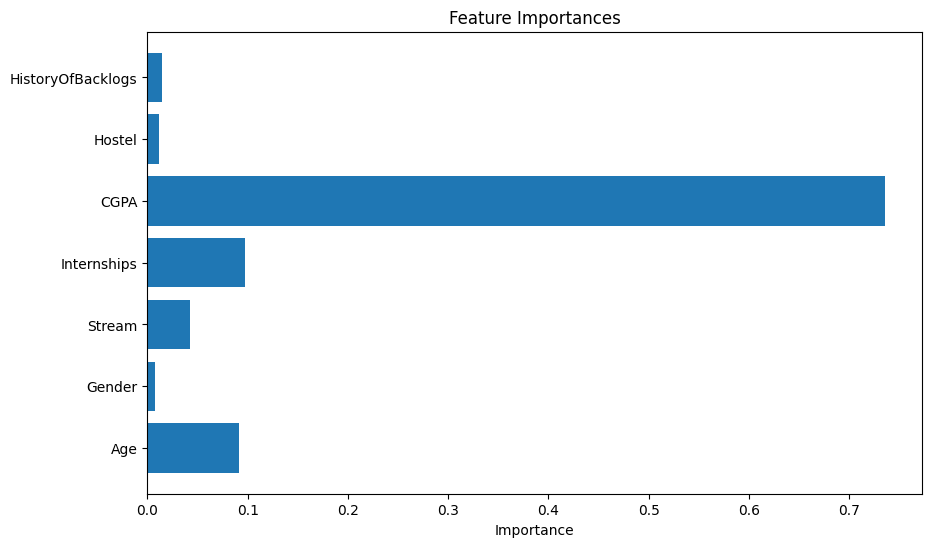

In [54]:
print("Feature Importances:")
for feature, importance in zip(X_train.columns, classifier.feature_importances_):
    print(f"{feature}: {importance}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, classifier.feature_importances_)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()